### Examine eddy motion parameters; combine with QC spreadsheet for usability

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob

In [33]:
home = '/Users/lucindasisk/Desktop/Milgram/candlab/analyses/shapes/dwi/data/3_Eddy_Corrected'
proj = '/Users/lucindasisk/Box/LS_Folders/CANDLab/Projects/Trauma_DTI'

In [45]:
qc_data = pd.read_csv(proj + '/DiffusionQAShapes-ShapesDWIRawDataQAAl_DATA_2021-03-03_1332.csv').rename(columns = {'subid':'Subject'})
qc_data['Subject'] = qc_data['Subject'].str.split('-', expand=True)

In [53]:
subjects = pd.Series(glob(home + '/sub*')).str.replace(home + '/', '').tolist()

In [54]:
outputs = []
for i in range(0, len(subjects)):
    sub = subjects[i]
    file = pd.read_csv(home + '/{}/eddy_corrected.eddy_movement_rms'.format(sub), 
                   sep = ' ').rename(columns = {'0':"Absolute_RMS",'0.1':"Relative_RMS"}).drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    data = file['Relative_RMS']
    mean_rms = data.mean()
    outputs.append([sub, mean_rms])

In [61]:
mean_rms = pd.DataFrame(outputs, columns = ['Subject', 'Mean_RMS'])
mean_rms['Subject'] = mean_rms['Subject'].str.replace('sub-', '')
mean_rms_qc = pd.merge(mean_rms, qc_data[['Subject', 'scan1_ranking']], on = 'Subject', how = 'inner').sort_values(by='scan1_ranking')

<AxesSubplot:xlabel='scan1_ranking', ylabel='Mean_RMS'>

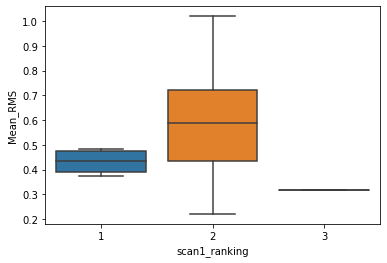

In [63]:
sns.boxplot(x='scan1_ranking', y='Mean_RMS', data= mean_rms_qc)